In [1]:
# import all the needed liberaries and modules
import pandas as pd
import numpy as np
import zipfile as zf
import glob
import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time
import re
from timeit import default_timer as timer

# Step 1: Gathering Data


### a) Open uploaded file

In [2]:
#Open the given CSV file (file in hand)
twitter_archive = pd.read_csv("twitter-archive-enhanced-2.csv")

### b) Download file from URL

In [3]:
#Get file from the given link using requests
img_predict_url = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

#Download and save the file with the name (image_predictions.tsv)
open ("image_predictions.tsv", "wb").write(img_predict_url.content)

#open the file using pandas
img_predict = pd.read_csv("image_predictions.tsv", sep='\t')

### c) Download file from Twitter API

In [4]:
## Get the page object
## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
## These are hidden to comply with Twitter's API terms and conditions

#consumer_key = 'Hidden'
#consumer_secret = 'Hidden'
#access_token = 'Hidden'
#access_secret = 'Hidden'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

## Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    ## This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [5]:
#Open txt file then convert it to json
twitter_api = []

with open ("tweet_json.txt", "r") as file:
    for line in file:
        json_object = json.loads(line)
        tweet_id = json_object['id']
        retweet_count = json_object['retweet_count']
        fav_count = json_object['favorite_count']
        
        twitter_api.append({'tweet_id':tweet_id, 'retweet_count': retweet_count,'favorit_count': fav_count})
        
twitter_api_archive = pd.DataFrame(twitter_api)

# Step 2: Data Assesing

### a) Assessing (twitter_archive)

In [6]:
#Visual_Assess
twitter_archive
    ##inspect it using Excel

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
# programatic_Assess
list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.shape

(2356, 17)

In [10]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
twitter_archive[twitter_archive['name'].apply(len) <= 2].name.count()

79

In [12]:
twitter_archive[twitter_archive['name'].apply(len) <= 2].name.value_counts()

a     55
Bo     9
an     7
Mo     1
my     1
Al     1
O      1
Jo     1
Ed     1
by     1
JD     1
Name: name, dtype: int64

In [13]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
twitter_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [18]:
twitter_archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [19]:
twitter_archive[twitter_archive['rating_denominator']!= 10].rating_denominator.count()

23

In [20]:
twitter_archive[twitter_archive['rating_denominator']!= 10].rating_denominator.value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

In [21]:
twitter_archive[twitter_archive['rating_numerator'] > 15].rating_numerator.count()

26

In [22]:
twitter_archive[twitter_archive['rating_numerator'] > 15].rating_numerator.value_counts()

420     2
75      2
60      1
27      1
99      1
165     1
80      1
144     1
44      1
204     1
45      1
88      1
143     1
1776    1
17      1
50      1
26      1
84      1
182     1
20      1
24      1
121     1
666     1
960     1
Name: rating_numerator, dtype: int64

In [23]:
twitter_archive[twitter_archive['rating_numerator'] < 5 ].rating_numerator.count()

56

In [24]:
twitter_archive[twitter_archive['rating_numerator'] < 5].rating_numerator.value_counts()

3    19
4    17
2     9
1     9
0     2
Name: rating_numerator, dtype: int64

### b) Assessing (img_predict)

In [25]:
#Visual_Assess
img_predict
    ##inspect it using Excel

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [26]:
img_predict.shape

(2075, 12)

In [27]:
list(img_predict)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [28]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [29]:
img_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
img_predict['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [31]:
img_predict['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [32]:
img_predict['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [33]:
img_predict[img_predict['p1_conf']>1].p1_conf.value_counts().sum()

0

In [34]:
img_predict[img_predict['p2_conf']>1].p2_conf.value_counts().sum()

0

In [35]:
img_predict[img_predict['p3_conf']>1].p3_conf.value_counts().sum()

0

### c) Assessing (twitter_api_archive)

In [36]:
#Visual_Assess
twitter_api_archive

,tweet_id,retweet_count,favorit_count
0,892420643555336193,7456,35325
1,892177421306343426,5535,30577
2,891815181378084864,3661,23006
3,891689557279858688,7626,38619
4,891327558926688256,8226,36889
...,...,...,...
2326,666049248165822465,39,95
2327,666044226329800704,124,263
2328,666033412701032449,39,108
2329,666029285002620928,41,118


In [37]:
# programatic_Assess
list(twitter_api_archive)

['tweet_id', 'retweet_count', 'favorit_count']

In [38]:
twitter_api_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2331 non-null   int64
 1   retweet_count  2331 non-null   int64
 2   favorit_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [39]:
twitter_api_archive.shape

(2331, 3)

In [40]:
twitter_api_archive.isnull().sum()

tweet_id         0
retweet_count    0
favorit_count    0
dtype: int64

In [41]:
twitter_api_archive.retweet_count.describe()

count     2331.000000
mean      2619.099957
std       4431.518992
min          1.000000
25%        530.500000
50%       1222.000000
75%       3042.000000
max      75257.000000
Name: retweet_count, dtype: float64

In [42]:
twitter_api_archive.favorit_count.describe()

count      2331.000000
mean       7381.400257
std       11464.453977
min           0.000000
25%        1282.500000
50%        3201.000000
75%        9030.500000
max      152201.000000
Name: favorit_count, dtype: float64

#### Assessing Results

- (1) twitter_archive assissment:

    a) Quality Assessment
    
        1) Some columns have inappropriate names(time_stamp, source,text, name).
        2) Column "timestamp" type is object need to be changed to timedate format.
        3) Name column contains some inappropriate values (names < 2 letters).
        4) In "rating_denominator" there are values != 10.
        5) In "rating_numerator" there are values > 15.
                
    b) Tidiness Assessment
        1) It contains retweet and tweet's replies columns that needed to be removed.
        2) There are four columns for the dog stage.

- (2) img_predict assissment:

    a) Quality Assessment
        1) Some columns have inappropriate names(p1_conf, p1_dog, p1, ..etc).
        2) Remove false values in "p1_dog".
            
    b) Tidiness Assessment
        1) This data frame is better to be combined with "twitter_archive" dataframe  that would be more reasonable and both contain data for the same object.
        2) There are three columns for prediction algorithms and same for results and is it a dog.

- (3) twitter_api_archive:

    b) Tidiness Assessment
        1)This data frame is better to be combined with "twitter_archive" dataframe  that would be more reasonable and both contain data for the same object.

# Step 3: Clean Data

In [43]:
# creat a copy of all the 3 dataframes to modify and clean
twitter_archive_new = twitter_archive.copy()
img_predict_new = img_predict.copy()
twitter_api_new = twitter_api_archive.copy()

##### twitter_archive_new

In [44]:
# change time_stamp column type from object to datetime formate
twitter_archive_new['timestamp'] = pd.to_datetime(twitter_archive_new['timestamp'])
# test
twitter_archive_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [45]:
# test
twitter_archive_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [46]:
# convert None values in "doggo" column with empty string ""
twitter_archive_new.doggo.replace(to_replace=['None'], value="", inplace=True)
# test 1
twitter_archive_new.doggo.value_counts()

         2259
doggo      97
Name: doggo, dtype: int64

In [47]:
# convert None values in "floofer" column with empty string ""
twitter_archive_new.floofer.replace(to_replace=['None'], value="", inplace=True)
# test 1
twitter_archive_new.floofer.value_counts()

           2346
floofer      10
Name: floofer, dtype: int64

In [48]:
# convert None values in "pupper" column with empty string ""
twitter_archive_new.pupper.replace(to_replace=['None'], value="", inplace=True)
# test 1
twitter_archive_new.pupper.value_counts()

          2099
pupper     257
Name: pupper, dtype: int64

In [49]:
# convert None values in "puppo" column with empty string ""
twitter_archive_new.puppo.replace(to_replace=['None'], value="", inplace=True)
# test 1
twitter_archive_new.puppo.value_counts()

         2326
puppo      30
Name: puppo, dtype: int64

In [50]:
# combine the four columns ("doggo", "floofer", "pupper", "puppo") in ("dog_stage")
twitter_archive_new["dog_stage"] = twitter_archive_new["doggo"] + twitter_archive_new["floofer"] + twitter_archive_new["pupper"] + twitter_archive_new["puppo"]

In [51]:
#test
twitter_archive_new["dog_stage"].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [52]:
# fixing combined values rows in "dog_stage" column
for index, row in twitter_archive_new.iterrows():
    twitter_archive_new.loc[twitter_archive_new["dog_stage"] == "doggopupper", "dog_stage"] = "doggo-Pupper"
    twitter_archive_new.loc[twitter_archive_new["dog_stage"] == "doggofloofer", "dog_stage"] = "doggo-Floofer"
    twitter_archive_new.loc[twitter_archive_new["dog_stage"] == "doggopuppo", "dog_stage"] = "doggo-Puppo"

In [53]:
#test
twitter_archive_new["dog_stage"].value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo-Pupper       12
floofer             9
doggo-Floofer       1
doggo-Puppo         1
Name: dog_stage, dtype: int64

In [54]:
# Make column "dog_stage" variables start with capital letters
twitter_archive_new['dog_stage'] = twitter_archive_new['dog_stage'].str.capitalize()

In [55]:
#test
twitter_archive_new["dog_stage"].value_counts()

                 1976
Pupper            245
Doggo              83
Puppo              29
Doggo-pupper       12
Floofer             9
Doggo-puppo         1
Doggo-floofer       1
Name: dog_stage, dtype: int64

In [56]:
# converting empty string "" in "dog_stage" column to Nan
twitter_archive_new.dog_stage.replace(to_replace=[""], value=np.nan, inplace=True)

In [57]:
# test
twitter_archive_new["dog_stage"].isnull().sum()

1976

In [58]:
#Drop the four columns ("doggo", "floofer", "pupper", "puppo")
col_drop_stage = ["doggo", "floofer", "pupper", "puppo"]
twitter_archive_new.drop(col_drop_stage, inplace=True, axis=1)

In [59]:
# test
list(twitter_archive_new)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

In [60]:
# give column appropriate names
twitter_archive_new.rename(columns = {'timestamp':'tweet_timestamp', 'source':'tweet_source', 'text':'tweet_text', 'name':'dog_name'} , inplace=True)

In [61]:
# test
list(twitter_archive_new)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_timestamp',
 'tweet_source',
 'tweet_text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'dog_stage']

##### img_predict_new

In [62]:
# As the prediction "p1" is the most likely one. will drop the other 2 predictions column and depend only on "p1" results
col_drop_pred = ["p2", "p3", "p2_conf", "p2_dog", "p3_conf", "p3_dog"]
img_predict_new.drop(col_drop_pred, inplace=True, axis=1)

In [63]:
# test
list(img_predict_new)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog']

In [64]:
# test
img_predict_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 66.9+ KB


In [65]:
# change the column names to appropriate ones
img_predict_new.rename(columns = {'p1':'predicted_type', 'p1_conf':'prediction_accuracy', 'p1_dog':'is_dog'} , inplace=True)

In [66]:
# test
list(img_predict_new)

['tweet_id',
 'jpg_url',
 'img_num',
 'predicted_type',
 'prediction_accuracy',
 'is_dog']

##### combine "img_predict_new" and "twitter_archive_new" 

In [67]:
# combine both dataframes "img_predict_new" and "twitter_archive_new" as they are about the same object
tweets_df = twitter_archive_new.join(img_predict_new.set_index("tweet_id"), on = "tweet_id", how = "left")

In [68]:
# test 1
list(tweets_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_timestamp',
 'tweet_source',
 'tweet_text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'predicted_type',
 'prediction_accuracy',
 'is_dog']

In [69]:
#test 2
tweets_df.shape

(2356, 19)

In [70]:
# drop rows with "jpg_url" is NaN
tweets_df.drop(index=tweets_df[tweets_df["jpg_url"].isnull()].index, inplace=True)

In [71]:
# test
tweets_df["jpg_url"].isnull().sum()

0

In [72]:
#test
tweets_df.shape

(2075, 19)

In [73]:
# drop rows with "in_reply_to_status_id" is not NaN
tweets_df.drop(index=tweets_df[tweets_df["in_reply_to_status_id"].notnull()].index, inplace=True)

In [74]:
# drop rows with "retweeted_status_id" is not NaN
tweets_df.drop(index=tweets_df[tweets_df["retweeted_status_id"].notnull()].index, inplace=True)

In [75]:
# test
tweets_df.retweeted_status_id.notnull().sum()

0

In [76]:
# test
tweets_df.in_reply_to_status_id.notnull().sum()

0

In [77]:
# test
tweets_df.shape

(1971, 19)

In [78]:
# Drop columns of retweets and replies
re_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
tweets_df.drop(re_cols, inplace=True, axis=1)

In [79]:
# test
list(tweets_df)

['tweet_id',
 'tweet_timestamp',
 'tweet_source',
 'tweet_text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'predicted_type',
 'prediction_accuracy',
 'is_dog']

In [80]:
# drop rows with "is_dog" is False
tweets_df.drop(index=tweets_df[tweets_df["is_dog"] == False].index, inplace=True)

In [81]:
# test
tweets_df.is_dog.value_counts()

True    1463
Name: is_dog, dtype: int64

In [82]:
# After removing false values from "is_dog" it is better to be removed it have no indication
tweets_df.drop("is_dog", inplace=True, axis=1)

In [83]:
# test
list(tweets_df)

['tweet_id',
 'tweet_timestamp',
 'tweet_source',
 'tweet_text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'predicted_type',
 'prediction_accuracy']

In [84]:
# More investigation for denominator and nominator columns
tweets_df[tweets_df['rating_denominator']!= 10].rating_denominator.value_counts()

50     3
80     2
110    1
11     1
90     1
150    1
40     1
7      1
70     1
20     1
2      1
Name: rating_denominator, dtype: int64

In [85]:
tweets_df[tweets_df['rating_denominator']!= 10]

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,img_num,predicted_type,prediction_accuracy
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,West_Highland_white_terrier,0.872064
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,golden_retriever,0.871342
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,NaN,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1.0,Labrador_retriever,0.436377
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,golden_retriever,0.807644
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,Great_Dane,0.246762
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,Siberian_husky,0.396495
1228,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,golden_retriever,0.371816
1254,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,soft-coated_wheaten_terrier,0.948617
1274,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,NaN,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,borzoi,0.490783
1351,704054845121142784,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,NaN,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.0,Great_Pyrenees,0.667939


In [86]:
# Fix "rating_denominator" manually row by row after investigating the tweet text
# found some numbers are  multiplied by the number of dogs in picture 
# and some other are mistake in extracting the right info. from the text
# fix that issue and fix the corresponding value in "rating_numerator"
# one row found needed to be drop it contain no useful info. help in fixing (row No.516)

tweets_df.loc[:,"rating_denominator"] = 10
numerator_list_index_to_change = (433,902,1068,1165,1202,1228,1254,1274,1351,1433,1635,1843,2335)
numerator_list_new_val = (12,11,14,13,11,11,10,8,12,11,11,11,9)
tweets_df.loc[numerator_list_index_to_change,"rating_numerator"] = numerator_list_new_val

# drop rows No.516
tweets_df.drop(index=tweets_df[tweets_df["rating_denominator"] == 7].index, inplace=True)

In [87]:
# Test
tweets_df.rating_denominator.value_counts()

10    1463
Name: rating_denominator, dtype: int64

In [88]:
tweets_df[tweets_df['rating_numerator'] <= 5].rating_numerator.value_counts().sum()

18

In [89]:
tweets_df[tweets_df['rating_numerator'] <= 5].rating_numerator.value_counts()

5    10
4     4
3     3
2     1
Name: rating_numerator, dtype: int64

In [90]:
tweets_df[tweets_df['rating_numerator'] <= 5]

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,img_num,predicted_type,prediction_accuracy
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,golden_retriever,0.943082
730,781661882474196992,2016-09-30 01:08:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,NaN,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1.0,Pembroke,0.438087
765,777885040357281792,2016-09-19 15:00:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,NaN,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1.0,Afghan_hound,0.123529
956,751583847268179968,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,Doggo-pupper,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1.0,dalmatian,0.868304
1004,747816857231626240,2016-06-28 15:40:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,a,NaN,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1.0,Pembroke,0.768923
1189,718246886998687744,2016-04-08 01:19:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,NaN,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,1.0,Chihuahua,0.354488
1508,691483041324204033,2016-01-25 04:49:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,5,10,None,NaN,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,1.0,bloodhound,0.886232
1701,680940246314430465,2015-12-27 02:36:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Alice. She's an idiot. 4/10 https://t....,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,NaN,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1.0,soft-coated_wheaten_terrier,0.289598
1764,678424312106393600,2015-12-20 03:58:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,NaN,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1.0,Maltese_dog,0.759945
1796,677301033169788928,2015-12-17 01:35:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Juckson. He's totally on his way to a ...,https://twitter.com/dog_rates/status/677301033...,5,10,Juckson,NaN,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1.0,Japanese_spaniel,0.661178


In [91]:
# Fix "rating_numerator" <= 5 manually row by row after investigating the tweet text
# found some pics are not dogs will be removed
# and some other are mistake in extracting the right info. from the text
# others will remain the same that is the true rating

numerator_list_index_to_change_1 = (45, 1901)
numerator_list_new_val_1 = (13.5, 8)
tweets_df.loc[numerator_list_index_to_change_1,"rating_numerator"] = numerator_list_new_val_1

tweets_df.drop([765,1004,1189,1701,2288,2316], inplace=True)

In [92]:
# Test
tweets_df[tweets_df['rating_numerator'] <= 5].rating_numerator.value_counts()

5.0    8
3.0    1
2.0    1
Name: rating_numerator, dtype: int64

In [93]:
tweets_df[tweets_df['rating_numerator'] > 15].rating_numerator.value_counts()

26.0    1
27.0    1
75.0    1
24.0    1
Name: rating_numerator, dtype: int64

In [94]:
tweets_df[tweets_df['rating_numerator'] > 15]

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,img_num,predicted_type,prediction_accuracy
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,10,Sam,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,golden_retriever,0.871342
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,Pomeranian,0.467321
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10,Sophie,Pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,clumber,0.946718
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10,None,NaN,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1.0,kuvasz,0.438627


In [95]:
# Fix "rating_numerator" > 15 manually row by row after investigating the tweet text
# they are mistake in extracting the right info. from the text

# Convert "rating_numerator" type from int64 to float64
tweets_df.rating_numerator = tweets_df.rating_numerator.astype(float)

numerator_list_index_to_change_2 = (695, 763,1712)
numerator_list_new_val_2 = (9.75, 11.27,11.26)
tweets_df.loc[numerator_list_index_to_change_2,"rating_numerator"] = numerator_list_new_val_2

In [96]:
#test
tweets_df[tweets_df['rating_numerator'] > 15].rating_numerator.value_counts().sum()

1

In [97]:
tweets_df.shape

(1457, 13)

In [98]:
tweets_df[tweets_df['dog_name'].apply(len) <= 2].dog_name.value_counts().sum()

55

In [99]:
tweets_df[tweets_df['dog_name'].apply(len) <= 2].dog_name.value_counts()

a     42
Bo     5
an     3
my     1
O      1
JD     1
Jo     1
Ed     1
Name: dog_name, dtype: int64

In [100]:
tweets_df[tweets_df['dog_name'].apply(len) <= 2]

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,img_num,predicted_type,prediction_accuracy
56,881536004380872706,2017-07-02 15:32:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10,a,Pupper,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1.0,Samoyed,0.281463
449,819004803107983360,2017-01-11 02:15:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10,Bo,Doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1.0,standard_poodle,0.351308
679,789137962068021249,2016-10-20 16:15:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,https://twitter.com/dog_rates/status/789137962...,12.0,10,Bo,NaN,https://pbs.twimg.com/media/CvOUw8vWYAAzJDq.jpg,2.0,Chihuahua,0.746135
775,776201521193218049,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10.0,10,O,NaN,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1.0,Rottweiler,0.502228
801,772581559778025472,2016-09-04 23:46:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10.0,10,a,NaN,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,3.0,Newfoundland,0.574345
852,765395769549590528,2016-08-16 03:52:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13.0,10,my,NaN,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1.0,Pembroke,0.509491
876,761004547850530816,2016-08-04 01:03:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo and Ty. Bo eats paper and Ty felt l...,https://twitter.com/dog_rates/status/761004547...,11.0,10,Bo,NaN,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1.0,golden_retriever,0.735163
978,749996283729883136,2016-07-04 16:00:22+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Bo. He emanates happiness. 12/10 I cou...,https://twitter.com/dog_rates/status/749996283...,12.0,10,Bo,NaN,https://pbs.twimg.com/media/CmfoyrrW8AA8v7w.jpg,1.0,Old_English_sheepdog,0.515319
1002,747885874273214464,2016-06-28 20:14:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8.0,10,a,NaN,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1.0,kuvasz,0.408450
1017,746872823977771008,2016-06-26 01:08:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11.0,10,a,NaN,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,1.0,Pembroke,0.540201


In [101]:
# Fix len("dog_name") <= 2 manually row by row after investigating the tweet text
# found some values are the real dog names (Bo, Jo, Ed, JD)
# and some are not a dog pic with row index=1025
# others are mistake with extracting right info from text

tweets_df.drop([1025,801,1737], inplace=True)

dog_name_list_index_to_change = (1853,2034,2066,2128,2161,2191,2218,2235,2314,2311,2287,2273,2264,2249,2255,2204,2335,852,775)
dog_name_list_new_val= ("Wylie","Jacob","Rufus","Hemry","Alfredo","Leroi","Chuk","Alfonso","Johm","Octaviath","Darly","Kohl","Klint","Cheryl","Jessiga","Berta","No_name","Zoey","O'malley")
tweets_df.loc[dog_name_list_index_to_change,"dog_name"] = dog_name_list_new_val

tweets_df.dog_name.replace(to_replace=["a"], value="No_name", inplace=True)

In [102]:
# test
tweets_df[tweets_df['dog_name'].apply(len) <= 2].dog_name.value_counts().sum()

8

In [103]:
# test
tweets_df[tweets_df['dog_name'].apply(len) <= 2].dog_name.value_counts()

Bo    5
Ed    1
Jo    1
JD    1
Name: dog_name, dtype: int64

In [104]:
tweets_df.dog_name.value_counts()

None       347
No_name     26
Charlie     10
Cooper      10
Oliver       9
          ... 
Harry        1
Lilah        1
Margo        1
Perry        1
Cheryl       1
Name: dog_name, Length: 771, dtype: int64

In [105]:
#Convert no_name values to NaN in dog_name column
tweets_df.dog_name.replace(to_replace=["No_name"], value=np.nan, inplace=True)
#Convert None values to NaN in dog_name column
tweets_df.dog_name.replace(to_replace=["None"], value=np.nan, inplace=True)

In [106]:
# test
tweets_df.dog_name.value_counts()

Charlie    10
Cooper     10
Oliver      9
Lucy        8
Tucker      8
           ..
Gin         1
Loomis      1
Harry       1
Lilah       1
Cheryl      1
Name: dog_name, Length: 769, dtype: int64

##### combine "tweets_df" and "twitter_api_archive" 

In [107]:
# combine both dataframes ""tweets_df" and "twitter_api_archive" as they are about the same object
twitter_df = tweets_df.join(twitter_api_archive.set_index("tweet_id"), on = "tweet_id", how = "left")

In [108]:
#test
list(twitter_df)

['tweet_id',
 'tweet_timestamp',
 'tweet_source',
 'tweet_text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'predicted_type',
 'prediction_accuracy',
 'retweet_count',
 'favorit_count']

In [109]:
#test
twitter_df.shape

(1454, 15)

In [110]:
#test
twitter_df.isnull().sum()

tweet_id                  0
tweet_timestamp           0
tweet_source              0
tweet_text                0
expanded_urls             0
rating_numerator          0
rating_denominator        0
dog_name                373
dog_stage              1227
jpg_url                   0
img_num                   0
predicted_type            0
prediction_accuracy       0
retweet_count             7
favorit_count             7
dtype: int64

In [111]:
#Convert Nan values to (0) in "retweet_count" & "favorit_count" columnn
twitter_df['retweet_count'] = twitter_df['retweet_count'].fillna(0)
twitter_df['favorit_count'] = twitter_df['favorit_count'].fillna(0)

In [112]:
#test
twitter_df.isnull().sum()

tweet_id                  0
tweet_timestamp           0
tweet_source              0
tweet_text                0
expanded_urls             0
rating_numerator          0
rating_denominator        0
dog_name                373
dog_stage              1227
jpg_url                   0
img_num                   0
predicted_type            0
prediction_accuracy       0
retweet_count             0
favorit_count             0
dtype: int64

In [113]:
# test
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 1 to 2355
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             1454 non-null   int64              
 1   tweet_timestamp      1454 non-null   datetime64[ns, UTC]
 2   tweet_source         1454 non-null   object             
 3   tweet_text           1454 non-null   object             
 4   expanded_urls        1454 non-null   object             
 5   rating_numerator     1454 non-null   float64            
 6   rating_denominator   1454 non-null   int64              
 7   dog_name             1081 non-null   object             
 8   dog_stage            227 non-null    object             
 9   jpg_url              1454 non-null   object             
 10  img_num              1454 non-null   float64            
 11  predicted_type       1454 non-null   object             
 12  prediction_accuracy 

### some investigation for the full data set

In [114]:
twitter_df["predicted_type"].value_counts()

golden_retriever      137
Labrador_retriever     94
Pembroke               87
Chihuahua              77
pug                    54
                     ... 
clumber                 1
groenendael             1
Japanese_spaniel        1
EntleBucher             1
Scotch_terrier          1
Name: predicted_type, Length: 111, dtype: int64

In [115]:
#find out if there are any duplicate row values in "twitter_df"
twitter_df.duplicated(subset=None, keep='first').value_counts()

False    1454
dtype: int64

In [116]:
# Find if there are value in "dog_name" column == the
twitter_df[twitter_df['dog_name']== "the"].dog_name.value_counts().sum()

6

In [117]:
#after visual investigation found that all "the" values are four tweet without mentioned names
twitter_df.dog_name.replace(to_replace=["the"], value="No_name", inplace=True)

In [118]:
#test
twitter_df[twitter_df['dog_name'] == "the"].dog_name.value_counts().sum()

0

In [119]:
#Save the final dataframe to CSV file ("twitter_archive_master.csv")
twitter_df.to_csv("twitter_archive_master.csv", index=False)

# Step 4: Visualization and insights

<AxesSubplot:>

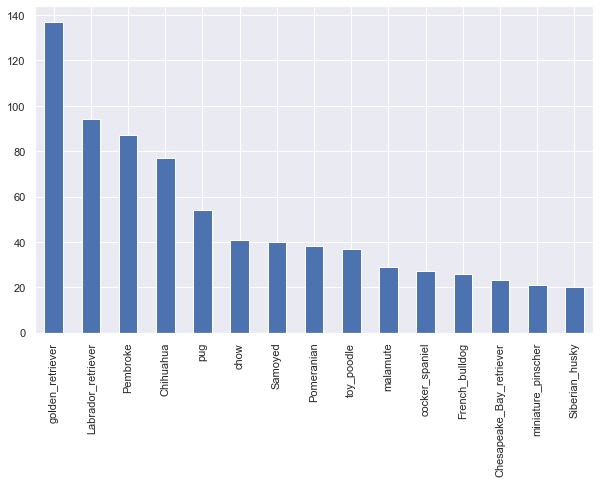

In [157]:
# Q1: What is the most popular dog breed "predicted_type"? is it associated with higher retweet and  favorit count?
twitter_df["predicted_type"].value_counts()[:15].plot(kind="bar")

In [147]:
predicted_type_df = twitter_df.groupby("predicted_type").retweet_count.mean().reset_index()

In [148]:
predicted_type_df["retweet_count"].max()

6787.0

In [149]:
predicted_type_df[predicted_type_df["retweet_count"] == 6787.0].index.values

array([0], dtype=int64)

In [150]:
predicted_type_df.iloc[0]

predicted_type    Afghan_hound
retweet_count             6787
Name: 0, dtype: object

In [151]:
predicted_type_df = twitter_df.groupby("predicted_type").favorit_count.mean().reset_index()

In [152]:
predicted_type_df["favorit_count"].max()

21725.0

In [153]:
predicted_type_df[predicted_type_df["favorit_count"] == 21725.0].index.values

array([52], dtype=int64)

In [145]:
predicted_type_df.iloc[52]

predicted_type    Saluki
favorit_count      21725
Name: 52, dtype: object

Text(0, 0.5, 'Mean Retweet Count')

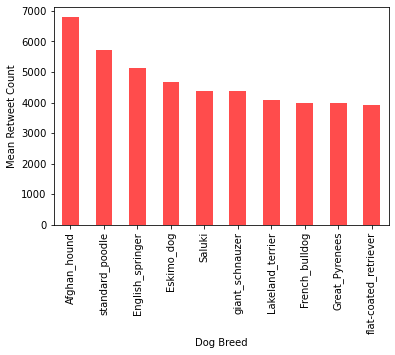

In [129]:
twitter_df.groupby('predicted_type').retweet_count.mean().sort_values(ascending=False)[:10].plot(kind="bar", color="red", alpha=0.7)
plt.xlabel('Dog Breed')
plt.ylabel("Mean Retweet Count")

Text(0, 0.5, 'Mean Favorit Count')

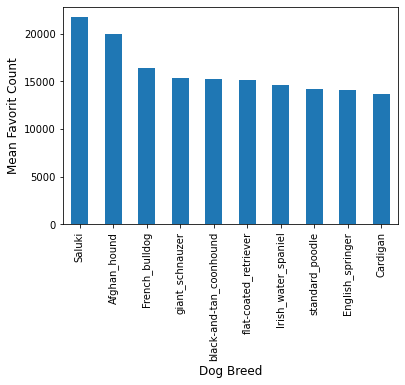

In [130]:
twitter_df.groupby('predicted_type').favorit_count.mean().sort_values(ascending=False)[:10].plot(kind="bar")
plt.xlabel("Dog Breed", fontsize=12)
plt.ylabel("Mean Favorit Count", fontsize=12)

Insight No. 1

- From the previous investigation found that:
    
    (1) Most loved dog based on average favorit_count is "Afghan_hound" and it is not the most popular dog type in pics. 
    
    (2) Most popular dog based on average retweet_count  is "Saluki" and it is not the most popular dog type in pics.
    
    (3) The most popular dog type in pics is "golden_retriever".

In [131]:
# Q2: What is the most popular dog stage "dog_stage" regarding "retweet_count" and "favorit_count" columns

twitter_df.dog_stage.value_counts()

Pupper           144
Doggo             48
Puppo             19
Floofer            7
Doggo-pupper       7
Doggo-puppo        1
Doggo-floofer      1
Name: dog_stage, dtype: int64

In [132]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})

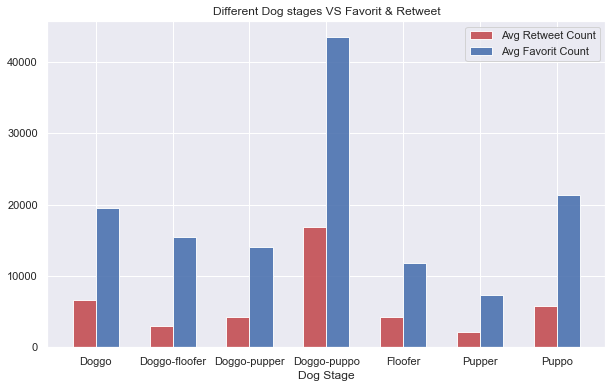

In [133]:
avg_retweet_count_stage = twitter_df.groupby('dog_stage').retweet_count.mean()
avg_favorite_count_stage = twitter_df.groupby('dog_stage').favorit_count.mean()  

labels = ['Doggo', 'Doggo-floofer', 'Doggo-pupper', 'Doggo-puppo', 'Floofer', 'Pupper', 'Puppo']
ind = np.arange(len(avg_favorite_count_stage))
width = 0.3
locations = ind + width / 2  # xtick locations

plt.xlabel('Dog Stage')
plt.title('Different Dog stages VS Favorit & Retweet')

red_bars = plt.bar(ind, avg_retweet_count_stage, width, color='r', alpha=.9, label='Avg Retweet Count')
white_bars = plt.bar(ind + width, avg_favorite_count_stage, width, color='b', alpha=.9, label='Avg Favorit Count')

plt.xticks(locations, labels)

plt.legend()

Insight No.2

- From the previous investigation found that:
    
    (1) Most popular dog stage based on both average retweet_count & favorit_count  is "Doggo-puppo" 

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(-5.0, 0, '(2017, 4)'),
  Text(0.0, 0, '(2015, 11)'),
  Text(5.0, 0, '(2016, 4)'),
  Text(10.0, 0, '(2016, 9)'),
  Text(15.0, 0, '(2017, 2)'),
  Text(20.0, 0, '(2017, 7)'),
  Text(25.0, 0, '')])

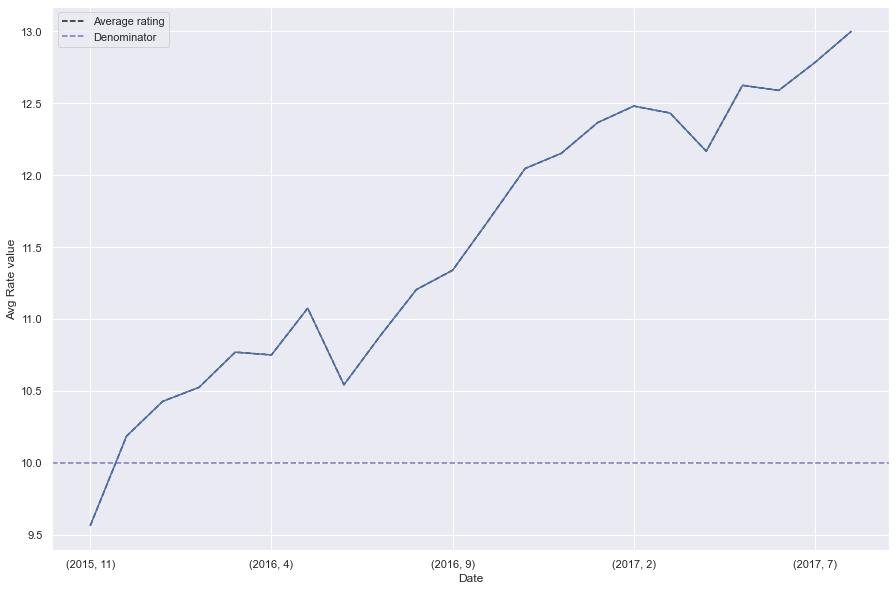

In [134]:
# Q3: What is the relation between time and rating_numerator

# Creat a copy of original dataframe
twitter_time_df = twitter_df.copy()

# Set the time stamp column as the index of the dataframe
twitter_time_df.index = twitter_time_df['tweet_timestamp']

# Drop the column that is now used as an index
twitter_time_df.drop(columns='tweet_timestamp',  inplace=True)

# Sort the index
twitter_time_df.sort_index(inplace=True)

# Group by the time frame
data = twitter_time_df.groupby([(twitter_time_df.index.year),(twitter_time_df.index.month)]).rating_numerator.mean()

# Plot data
data.plot(style='k--', figsize=(15,10),label='Average rating')
plt.legend()
plt.axhline(y=10.0, color='m', linestyle='--', label='Denominator')
plt.legend()
data.plot(xlabel="Date", ylabel="Avg Rate value")

plt.xticks()



Insight No.3

- From the previous investigation found that:
    
    (1) The Avg Rating increase with time 

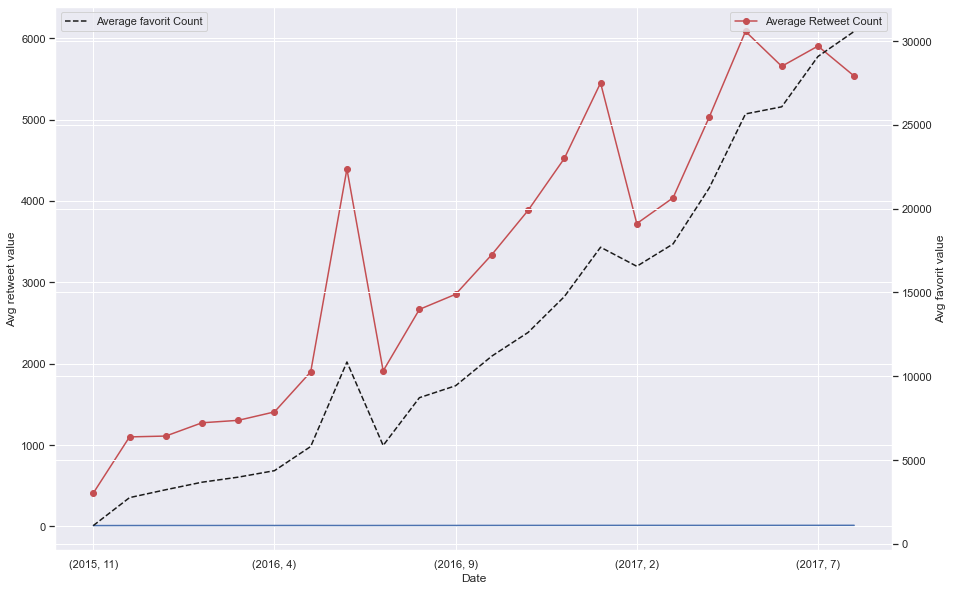

In [135]:
# Q4: What is the relation between time and retweet_count and favorit_count
# Group by the time frame
data_retweet = twitter_time_df.groupby([(twitter_time_df.index.year),(twitter_time_df.index.month)]).retweet_count.mean()
data_favorit = twitter_time_df.groupby([(twitter_time_df.index.year),(twitter_time_df.index.month)]).favorit_count.mean()

# Plot data

retweet = data_retweet.plot(style='-ro', figsize=(15,10), label='Average Retweet Count')
plt.legend(loc='upper right')


fav = data_favorit.plot(secondary_y=True, style='k--', figsize=(15,10),label='Average favorit Count')
plt.legend(loc="upper left")

data.plot(xlabel="Date")
retweet.set_ylabel("Avg retweet value")
fav.set_ylabel("Avg favorit value")
plt.xticks()

plt.show()

Insight No.4

- From the previous investigation found that:
    
    (1) The Avg_retweet_count and Avg_favorit_count increase with time 

<AxesSubplot:>

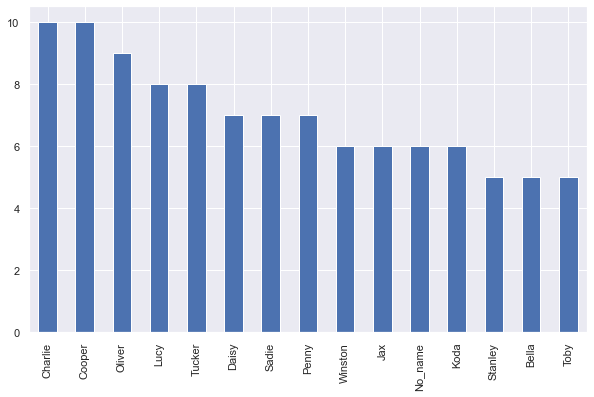

In [136]:
# Q5: What is the most common dog name?
twitter_df.dog_name.value_counts()[:15].plot(kind="bar")

Insight No.5

- From the previous investigation found that:
    
    (1) We cannot say that there is a more popular name than another one based on the data we have 